In [1]:
# pytorch-common-import!
import torch
import torch.nn.functional as F
from torch import nn
from torch.autograd import Variable 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
torch.manual_seed(2017)

In [5]:
with open('Base/data.txt', 'r') as f:
    data_list = [str.split('\n')[0].split(',') for str in f.readlines()]
    data = [(float(_str[0]), float(_str[1]), float(_str[2])) for _str in data_list]

In [6]:
x0_max = max([i[0] for i in data])

In [7]:
x1_max = max([i[1] for i in data])

In [8]:
data = [(str[0]/x0_max, str[1]/x1_max, str[2]) for str in data]

In [9]:
x0 = list(filter(lambda x:x[2] == 0.0, data))

In [10]:
x1 = list(filter(lambda x:x[2] == 1.0, data))

In [11]:
plot_list_zero  = [[str[0], str[1]] for str  in x0]

In [12]:
len(plot_list_zero)

40

In [13]:
plot_list_one  = [[str[0], str[1]] for str  in x1]

In [14]:
len(plot_list_one[0])

2

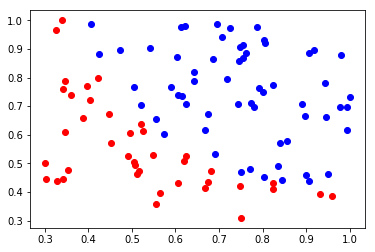

In [15]:
plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]

plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')

In [16]:
np_data = np.array(data, dtype="float32")

In [17]:
x_data = Variable(torch.from_numpy(np_data[:, 0:2]))

In [18]:
y_data = Variable(torch.from_numpy(np_data[:, -1]).unsqueeze(1))

In [19]:
w = nn.Parameter(torch.randn(2, 1))

In [20]:
b = nn.Parameter(torch.zeros(1), requires_grad=True)

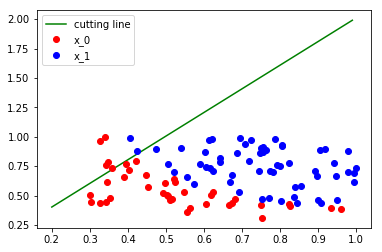

In [21]:
# 画出参数更新之前的结果
w0 = w[0].data[0]
w1 = w[1].data[0]
b0 = b.data[0]

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * Variable(torch.from_numpy(plot_x)) - b0) / w1

plt.plot(plot_x, plot_y.numpy(), 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [22]:
y_predict =torch.mm(x_data,w) + b

In [23]:
criterion = nn.BCEWithLogitsLoss()

In [24]:
loss = criterion(y_predict, y_data)

In [25]:
loss.backward()

In [26]:
optimizer = torch.optim.SGD([w,b], 1.)

In [27]:
optimizer.step()

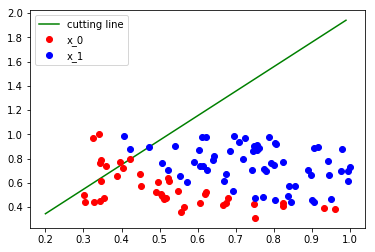

In [28]:
# 画出参数更新之前的结果
w0 = w[0].data[0]
w1 = w[1].data[0]
b0 = b.data[0]

plot_y = (-w0 * Variable(torch.from_numpy(plot_x)) - b0) / w1

plt.plot(plot_x, plot_y.numpy(), 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [29]:
print(loss)

tensor(0.6412, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


In [33]:
for i in range(1000):
    y_predict =torch.mm(x_data,w) + b
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(y_predict, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch: {}, loss: {}'.format(i,   loss.data))

epoch: 0, loss: 0.47138434648513794
epoch: 1, loss: 0.4703209400177002
epoch: 2, loss: 0.4692653715610504
epoch: 3, loss: 0.46821776032447815
epoch: 4, loss: 0.4671778380870819
epoch: 5, loss: 0.46614566445350647
epoch: 6, loss: 0.46512097120285034
epoch: 7, loss: 0.4641037881374359
epoch: 8, loss: 0.46309414505958557
epoch: 9, loss: 0.4620918035507202
epoch: 10, loss: 0.46109676361083984
epoch: 11, loss: 0.46010899543762207
epoch: 12, loss: 0.4591282904148102
epoch: 13, loss: 0.45815470814704895
epoch: 14, loss: 0.457188218832016
epoch: 15, loss: 0.4562286138534546
epoch: 16, loss: 0.4552758038043976
epoch: 17, loss: 0.45432987809181213
epoch: 18, loss: 0.4533907175064087
epoch: 19, loss: 0.45245814323425293
epoch: 20, loss: 0.4515322148799896
epoch: 21, loss: 0.45061278343200684
epoch: 22, loss: 0.44969993829727173
epoch: 23, loss: 0.44879350066185
epoch: 24, loss: 0.44789329171180725
epoch: 25, loss: 0.4469994604587555
epoch: 26, loss: 0.446111798286438
epoch: 27, loss: 0.4452303647

epoch: 278, loss: 0.3286028206348419
epoch: 279, loss: 0.328357994556427
epoch: 280, loss: 0.3281141221523285
epoch: 281, loss: 0.32787108421325684
epoch: 282, loss: 0.3276289999485016
epoch: 283, loss: 0.32738783955574036
epoch: 284, loss: 0.3271474838256836
epoch: 285, loss: 0.32690808176994324
epoch: 286, loss: 0.3266695439815521
epoch: 287, loss: 0.32643193006515503
epoch: 288, loss: 0.3261951208114624
epoch: 289, loss: 0.325959175825119
epoch: 290, loss: 0.3257240951061249
epoch: 291, loss: 0.32548990845680237
epoch: 292, loss: 0.3252565264701843
epoch: 293, loss: 0.3250240385532379
epoch: 294, loss: 0.3247923254966736
epoch: 295, loss: 0.3245615065097809
epoch: 296, loss: 0.32433146238327026
epoch: 297, loss: 0.3241023123264313
epoch: 298, loss: 0.32387396693229675
epoch: 299, loss: 0.3236464262008667
epoch: 300, loss: 0.3234196901321411
epoch: 301, loss: 0.3231937289237976
epoch: 302, loss: 0.32296866178512573
epoch: 303, loss: 0.32274436950683594
epoch: 304, loss: 0.32252091169

epoch: 571, loss: 0.28198471665382385
epoch: 572, loss: 0.2818812131881714
epoch: 573, loss: 0.281777948141098
epoch: 574, loss: 0.28167489171028137
epoch: 575, loss: 0.2815721035003662
epoch: 576, loss: 0.28146952390670776
epoch: 577, loss: 0.28136715292930603
epoch: 578, loss: 0.2812650799751282
epoch: 579, loss: 0.28116318583488464
epoch: 580, loss: 0.281061589717865
epoch: 581, loss: 0.2809602618217468
epoch: 582, loss: 0.2808590829372406
epoch: 583, loss: 0.28075820207595825
epoch: 584, loss: 0.2806575298309326
epoch: 585, loss: 0.2805570662021637
epoch: 586, loss: 0.28045687079429626
epoch: 587, loss: 0.28035688400268555
epoch: 588, loss: 0.28025713562965393
epoch: 589, loss: 0.2801576256752014
epoch: 590, loss: 0.280058354139328
epoch: 591, loss: 0.2799592912197113
epoch: 592, loss: 0.2798604667186737
epoch: 593, loss: 0.2797618806362152
epoch: 594, loss: 0.2796635329723358
epoch: 595, loss: 0.27956536412239075
epoch: 596, loss: 0.27946746349334717
epoch: 597, loss: 0.2793697416

epoch: 840, loss: 0.2607877850532532
epoch: 841, loss: 0.26072782278060913
epoch: 842, loss: 0.2606680393218994
epoch: 843, loss: 0.26060834527015686
epoch: 844, loss: 0.26054874062538147
epoch: 845, loss: 0.260489284992218
epoch: 846, loss: 0.26042988896369934
epoch: 847, loss: 0.2603705823421478
epoch: 848, loss: 0.26031139492988586
epoch: 849, loss: 0.26025235652923584
epoch: 850, loss: 0.2601933479309082
epoch: 851, loss: 0.2601344585418701
epoch: 852, loss: 0.26007574796676636
epoch: 853, loss: 0.2600170373916626
epoch: 854, loss: 0.25995850563049316
epoch: 855, loss: 0.2599000036716461
epoch: 856, loss: 0.2598417103290558
epoch: 857, loss: 0.25978338718414307
epoch: 858, loss: 0.25972527265548706
epoch: 859, loss: 0.2596672475337982
epoch: 860, loss: 0.25960925221443176
epoch: 861, loss: 0.25955140590667725
epoch: 862, loss: 0.2594936788082123
epoch: 863, loss: 0.2594360411167145
epoch: 864, loss: 0.25937846302986145
epoch: 865, loss: 0.25932103395462036
epoch: 866, loss: 0.25926

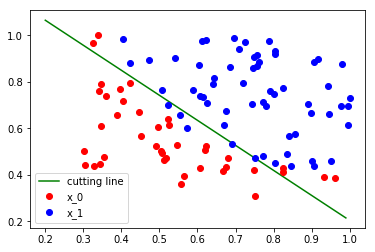

In [34]:
# 画出参数更新之前的结果
w0 = w[0].data[0]
w1 = w[1].data[0]
b0 = b.data[0]

plot_y = (-w0 * Variable(torch.from_numpy(plot_x)) - b0) / w1

plt.plot(plot_x, plot_y.numpy(), 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')